In [1]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

In [354]:
# ga ada
# url = "https://sirekap-obj-formc.kpu.go.id/de43/pemilu/ppwp/34/71/13/10/04/3471131004008-20240214-223456--ba7411d8-87fa-4c61-b646-dae9d2f6c7cf.jpg"
url = "https://sirekap-obj-formc.kpu.go.id/1934/pemilu/ppwp/34/02/04/20/03/3402042003013-20240216-135707--ec4f96ff-0da2-499c-91cf-6669eb1a5056.jpg"

# ada
# url = "https://sirekap-obj-formc.kpu.go.id/93b4/pemilu/ppwp/34/71/13/10/04/3471131004004-20240215-044705--47f736d8-7433-47f6-bdfd-3cf931633f46.jpg"
# url = "https://sirekap-obj-formc.kpu.go.id/000d/pemilu/ppwp/34/71/13/10/04/3471131004005-20240217-200122--3edab265-367f-4185-9df8-25ae407bb79b.jpg"

response = requests.get(url)
img = np.asarray(bytearray(response.content), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE)

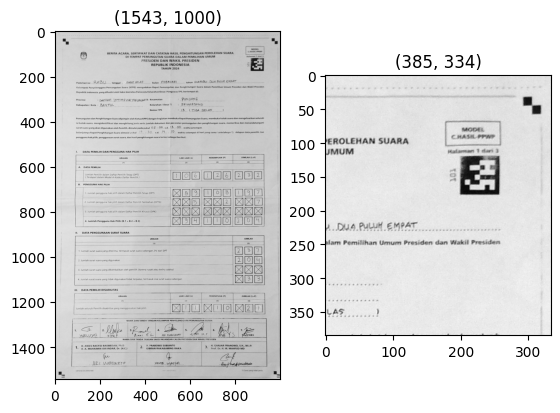

In [355]:
img_crop = img[:int(img.shape[0] / 4), int(img.shape[1] / 1.5):].copy()

fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap="gray")
ax[0].set_title(str(img.shape))

ax[1].imshow(img_crop, cmap="gray")
ax[1].set_title(str(img_crop.shape))

plt.show()

In [356]:
arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36h10)
arucoParams = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(dictionary=arucoDict, detectorParams=arucoParams)
(corners, ids, _) = detector.detectMarkers(img)
ids

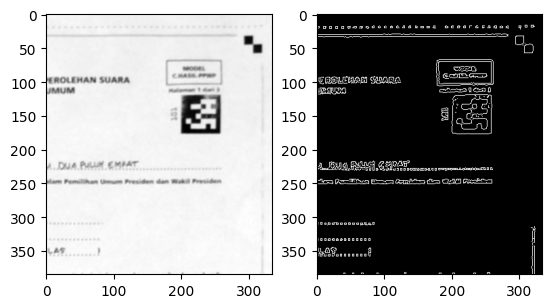

In [357]:
img_blur = cv2.GaussianBlur(img_crop, (5, 5), 1)
img_edges = cv2.Canny(img_blur, 10, 50)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_blur, cmap="gray")
ax[1].imshow(img_edges, cmap="gray")

plt.show()

In [358]:
has_square = False
img_contours = img_crop.copy()

contours = cv2.findContours(img_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
for i, contour in enumerate(contours):
    # if has_square:
    #     print("ADA ARUCO")
    #     break

    area = cv2.contourArea(contour)
    approx = cv2.approxPolyDP(contour, 10, True)
    x,y,w,h = cv2.boundingRect(contour)

    if len(approx) < 4 or area < 900:
        continue    

    aspect_ratio = w / h
    if aspect_ratio > 0.8 and aspect_ratio < 1.2:
        has_square = True
    
    img_contours = cv2.rectangle(img_contours,(x,y),(x+w,y+h),(0,255,0),2)   
    cv2.putText(img_contours, str(i), (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255))
    
    print(f"DETEK {i}")
    print(x, w, y, h)
    print(aspect_ratio)
    print(area)

print("ADA ARUCO =", has_square)

DETEK 100
199 60 119 59
1.0169491525423728
3279.0
DETEK 123
176 85 67 40
2.125
3128.5
ADA ARUCO = True


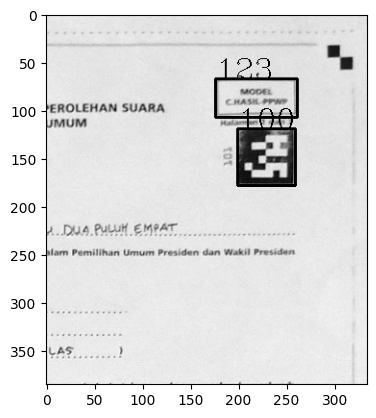

In [359]:
plt.imshow(img_contours, cmap="gray")